<a href="https://colab.research.google.com/github/robbi621/skripsi/blob/main/testing_skripsi_saham.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import datetime as dt
import pandas as pd
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

In [2]:
!wget -O UNTR.csv https://raw.githubusercontent.com/robbi621/skripsi/main/UNTR.JK.csv

--2022-07-17 16:37:55--  https://raw.githubusercontent.com/robbi621/skripsi/main/UNTR.JK.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 254503 (249K) [text/plain]
Saving to: ‘UNTR.csv’

UNTR.csv            100%[===================>] 248.54K  --.-KB/s    in 0.03s   

2022-07-17 16:37:55 (7.76 MB/s) - ‘UNTR.csv’ saved [254503/254503]



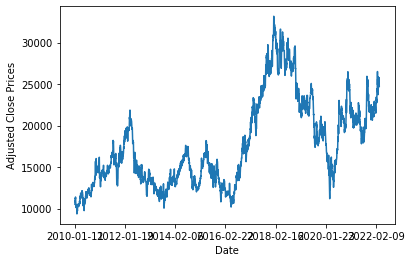

In [3]:
read_df = pd.read_csv("UNTR.csv")
read_df.set_index("Date", inplace=True)
read_df['Adj Close'].plot()
plt.ylabel("Adjusted Close Prices")
plt.show()

In [4]:
df = pd.read_csv("UNTR.csv")
df.set_index("Date", inplace=True)
df.dropna(inplace=True)

In [9]:
X = df.iloc[:, 0:5].values
y = df.iloc[:, 4].values

In [12]:
X.shape

(3034, 5)

In [14]:
y.shape

(3034,)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.26,  random_state=0)

In [16]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [20]:
grid_rf = {
'n_estimators': [20, 50, 100, 500, 1000],  
'max_depth': np.arange(1, 15, 1),  
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
'bootstrap': [True, False], 
'random_state': [1, 2, 30, 42]
}
rscv = RandomizedSearchCV(estimator=model, param_distributions=grid_rf, cv=3, n_jobs=-1, verbose=2, n_iter=200)
rscv_fit = rscv.fit(X_train, y_train)
best_parameters = rscv_fit.best_params_
print(best_parameters)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
{'random_state': 1, 'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': True}


In [21]:
model = RandomForestRegressor(n_estimators=500, random_state=42, min_samples_split=2, min_samples_leaf=1, max_depth=10, bootstrap=True)
model.fit(X_train, y_train)
predict = model.predict(X_test)
print(predict)
print(predict.shape)

[16828.60556401 23620.90244972 19760.84347298 13492.35555282
 19711.50607512 18120.67349343 12425.63472648 28681.95234681
 14808.15608621 21582.9488131  12906.94411174 12318.94287076
 19638.63851198 14213.68270911 17458.07258391 21858.67865146
 22026.55037922 10173.15636849 20129.43140759 26942.38411677
 22268.17416893 13781.40558096 14182.09037378 14992.93106441
 15024.2092417  30231.09912004 14998.18537174 19761.76415632
 13721.19495145 24632.00021884 22115.91208295 21473.53502014
 15041.98963553 15499.60887317 15357.02980442 14139.68798284
 18216.63956293 27528.22841572 11723.85049321 11131.35882058
 19760.15354999 29773.5849651  20327.50311947 20807.83180731
 13328.87266748 19283.76094515 26859.06461172 19246.60204007
 14603.65190833 14295.43615381 15552.56252922 24627.73678691
 14073.28719648 13755.15349622 18930.2804123  11935.21735289
 14029.55234979 13277.80081919 23587.55595097 18466.55940899
 22440.93413768 12215.41661477 11180.41798782 15484.61028063
 13966.7737152  14061.92

In [23]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score : {model.score(X_train, y_train) * 100:.2f}% and Test Score : {model.score(X_test, y_test) * 100:.2f}% using Random Forest Regressor.')
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 7.1245
Mean Squared Error: 1004.6224
Root Mean Squared Error: 31.6958
(R^2) Score: 1.0
Train Score : 100.00% and Test Score : 100.00% using Random Forest Regressor.
Accuracy: 99.96 %.


In [24]:
predictions = pd.DataFrame({"Predictions": predict}, index=pd.date_range(start=df.index[-1], periods=len(predict), freq="D"))
predictions.to_csv("Predicted-price-data.csv")
#colllects future days from predicted values
oneyear_df = pd.DataFrame(predictions[:252])
oneyear_df.to_csv("one-year-predictions.csv")
onemonth_df = pd.DataFrame(predictions[:21])
onemonth_df.to_csv("one-month-predictions.csv")
fivedays_df = pd.DataFrame(predictions[:5])
fivedays_df.to_csv("five-days-predictions.csv")

In [32]:
Predicted_price_data = pd.read_csv("Predicted-price-data.csv")
Predicted_price_data

,Unnamed: 0,Predictions
0,2022-03-31,16828.605564
1,2022-04-01,23620.902450
2,2022-04-02,19760.843473
3,2022-04-03,13492.355553
4,2022-04-04,19711.506075
...,...,...
784,2024-05-23,12837.408982
785,2024-05-24,14739.098941
786,2024-05-25,13910.824605
787,2024-05-26,13995.611057


Buy price and date
            Predictions
Unnamed: 0             
2022-06-12  9722.146229
Sell price and date
             Predictions
Unnamed: 0              
2023-08-06  32632.000015


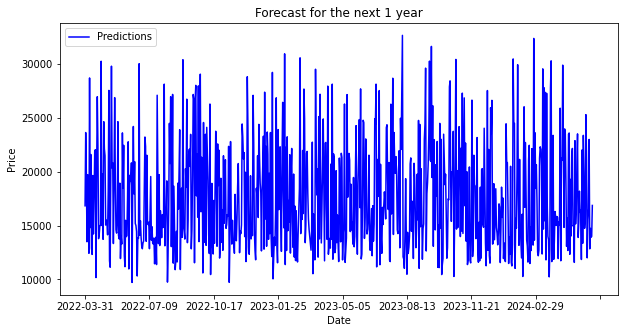

In [33]:
Predicted_price_data.set_index("Unnamed: 0", inplace=True)
buy_price = min(Predicted_price_data["Predictions"])
sell_price = max(Predicted_price_data["Predictions"])
oneyear_buy = Predicted_price_data.loc[Predicted_price_data["Predictions"] == buy_price]
oneyear_sell = Predicted_price_data.loc[Predicted_price_data["Predictions"] == sell_price]
print("Buy price and date")
print(oneyear_buy)
print("Sell price and date")
print(oneyear_sell)
Predicted_price_data["Predictions"].plot(figsize=(10, 5), title="Forecast for the next 1 year", color="blue")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [26]:
oneyear_df_pred = pd.read_csv("one-year-predictions.csv")
oneyear_df_pred

,Unnamed: 0,Predictions
0,2022-03-31,16828.605564
1,2022-04-01,23620.902450
2,2022-04-02,19760.843473
3,2022-04-03,13492.355553
4,2022-04-04,19711.506075
...,...,...
247,2022-12-03,21762.799195
248,2022-12-04,13969.558284
249,2022-12-05,19943.212397
250,2022-12-06,11656.644802


Buy price and date
            Predictions
Unnamed: 0             
2022-06-12  9722.146229
Sell price and date
            Predictions
Unnamed: 0             
2022-08-30  30372.69739


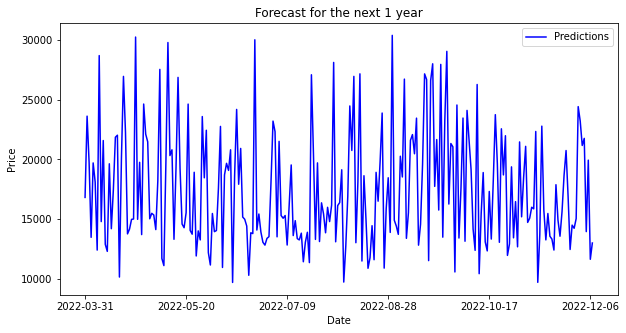

In [27]:
oneyear_df_pred.set_index("Unnamed: 0", inplace=True)
buy_price = min(oneyear_df_pred["Predictions"])
sell_price = max(oneyear_df_pred["Predictions"])
oneyear_buy = oneyear_df_pred.loc[oneyear_df_pred["Predictions"] == buy_price]
oneyear_sell = oneyear_df_pred.loc[oneyear_df_pred["Predictions"] == sell_price]
print("Buy price and date")
print(oneyear_buy)
print("Sell price and date")
print(oneyear_sell)
oneyear_df_pred["Predictions"].plot(figsize=(10, 5), title="Forecast for the next 1 year", color="blue")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [28]:
onemonth_df_pred = pd.read_csv("one-month-predictions.csv")
onemonth_df_pred

,Unnamed: 0,Predictions
0,2022-03-31,16828.605564
1,2022-04-01,23620.902450
2,2022-04-02,19760.843473
3,2022-04-03,13492.355553
4,2022-04-04,19711.506075
5,2022-04-05,18120.673493
6,2022-04-06,12425.634726
7,2022-04-07,28681.952347
8,2022-04-08,14808.156086
9,2022-04-09,21582.948813


Buy price and date
             Predictions
Unnamed: 0              
2022-04-17  10173.156368
Sell price and date
             Predictions
Unnamed: 0              
2022-04-07  28681.952347


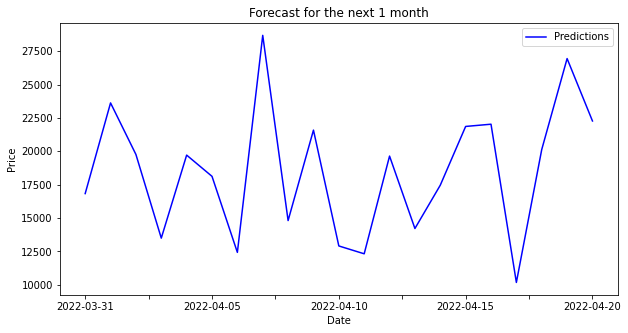

In [29]:
onemonth_df_pred.set_index("Unnamed: 0", inplace=True)
buy_price = min(onemonth_df_pred["Predictions"])
sell_price = max(onemonth_df_pred["Predictions"])
onemonth_buy = onemonth_df_pred.loc[onemonth_df_pred["Predictions"] == buy_price]
onemonth_sell = onemonth_df_pred.loc[onemonth_df_pred["Predictions"] == sell_price]
print("Buy price and date")
print(onemonth_buy)
print("Sell price and date")
print(onemonth_sell)
onemonth_df_pred["Predictions"].plot(figsize=(10, 5), title="Forecast for the next 1 month", color="blue")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [30]:
fivedays_df_pred = pd.read_csv("five-days-predictions.csv")
fivedays_df_pred

,Unnamed: 0,Predictions
0,2022-03-31,16828.605564
1,2022-04-01,23620.902450
2,2022-04-02,19760.843473
3,2022-04-03,13492.355553
4,2022-04-04,19711.506075


Buy price and date
             Predictions
Unnamed: 0              
2022-04-03  13492.355553
Sell price and date
            Predictions
Unnamed: 0             
2022-04-01  23620.90245


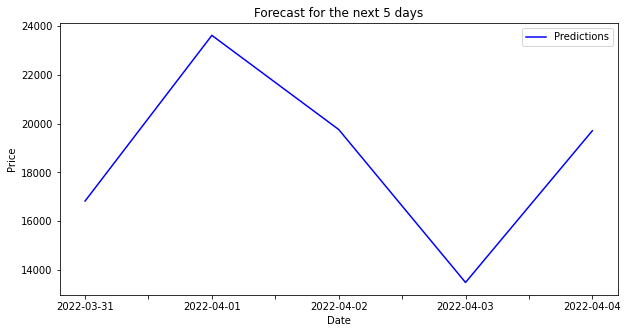

In [31]:
fivedays_df_pred.set_index("Unnamed: 0", inplace=True)
buy_price = min(fivedays_df_pred["Predictions"])
sell_price = max(fivedays_df_pred["Predictions"])
fivedays_buy = fivedays_df_pred.loc[fivedays_df_pred["Predictions"] == buy_price]
fivedays_sell = fivedays_df_pred.loc[fivedays_df_pred["Predictions"] == sell_price]
print("Buy price and date")
print(fivedays_buy)
print("Sell price and date")
print(fivedays_sell)
fivedays_df_pred["Predictions"].plot(figsize=(10, 5), title="Forecast for the next 5 days", color="blue")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()